In [1]:
# Importing necessary libraries
from collections import Counter
from typing import List, Tuple, Dict

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import powerlaw

In [2]:
def load_graph(file_path: str) -> nx.Graph:
    """
    Loads a graph from an edge list file.

    Args:
        file_path (str): Path to the file containing the edge list.

    Returns:
        nx.Graph: A graph created from the edge list.
    """
    return nx.read_edgelist(file_path, create_using=nx.Graph())

def analyze_network(graph: nx.Graph, name: str, max_nodes: int = 300) -> None:
    """
    Analyze the given network and visualize its properties.

    Args:
        graph (nx.Graph): The graph to analyze.
        name (str): Name of the network for labeling purposes.
        max_nodes (int): Maximum number of nodes for subgraph analysis. Defaults to 300.
    """
    print(f"Analyzing Network: {name}")
    print("Number of nodes:", graph.number_of_nodes())
    print("Number of edges:", graph.number_of_edges())

    components = list(nx.connected_components(graph))
    largest_component = max(components, key=len)
    print(f"Number of connected components: {len(components)}")
    print(f"Size of the largest component: {len(largest_component)}")

    print("Calculating centralities...")

    betweenness = nx.betweenness_centrality(graph)
    top_betweenness = get_top_items(betweenness, top_n=5)
    print("Top 5 nodes by betweenness centrality:", top_betweenness)

    closeness = nx.closeness_centrality(graph)
    top_closeness = get_top_items(closeness, top_n=5)
    print("Top 5 nodes by closeness centrality:", top_closeness)

    degree_centrality = nx.degree_centrality(graph)
    top_degree_centrality = get_top_items(degree_centrality, top_n=5)
    print("Top 5 nodes by degree centrality:", top_degree_centrality)

    if nx.is_connected(graph):
        diameter = nx.diameter(graph)
        print(f"Network diameter: {diameter}")
    else:
        print("The network is not connected; diameter cannot be computed.")

    visualize_degree_distribution(graph, name, max_nodes=max_nodes)

    visualize_subgraph(graph, name, top_n=30)

    hubs = get_top_items(dict(graph.degree()), top_n=5)
    print(f"Hubs in the {name} network:", hubs)
    print("\n")

def get_top_items(data: Dict, top_n: int = 5) -> List[Tuple]:
    """
    Get the top N items from a dictionary based on values.

    Args:
        data (Dict): Dictionary with nodes as keys and centrality values as values.
        top_n (int): Number of top items to retrieve. Defaults to 5.

    Returns:
        List[Tuple]: A list of tuples containing the top nodes and their values.
    """
    return sorted(data.items(), key=lambda x: x[1], reverse=True)[:top_n]

def visualize_degree_distribution(graph: nx.Graph, name: str, max_nodes: int = 300) -> None:
    """
    Visualize the degree distribution of the graph and its subgraph.

    Args:
        graph (nx.Graph): The graph to analyze.
        name (str): Name of the network for labeling purposes.
        max_nodes (int): Maximum number of nodes for subgraph analysis. Defaults to 300.
    """
    degrees = dict(graph.degree())
    top_nodes = [node for node, _ in sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:max_nodes]]
    subgraph = graph.subgraph(top_nodes)

    degree_values = [subgraph.degree(node) for node in subgraph.nodes()]
    degree_count = Counter(degree_values)

    # Bar chart of degree distribution
    plt.figure(figsize=(10, 6))
    plt.bar(degree_count.keys(), degree_count.values())
    plt.title(f"Degree Distribution for Subgraph ({name})")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

    # Log-log plot of degree distribution
    sorted_degrees = sorted(degree_count.keys())
    frequencies = [degree_count[deg] for deg in sorted_degrees]

    plt.figure(figsize=(10, 6))
    plt.loglog(sorted_degrees, frequencies, marker="o", linestyle="-", markersize=5)
    plt.title(f"Log-Log Degree Distribution ({name})")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

def visualize_subgraph(graph: nx.Graph, name: str, top_n: int = 30) -> None:
    """
    Visualize a subgraph with the top N nodes by degree.

    Args:
        graph (nx.Graph): The graph to visualize.
        name (str): Name of the network for labeling purposes.
        top_n (int): Number of top nodes to include in the subgraph. Defaults to 30.
    """
    degrees = dict(graph.degree())
    top_nodes = [node for node, _ in sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:top_n]]
    subgraph = graph.subgraph(top_nodes)

    pos = nx.spring_layout(subgraph)
    node_sizes = [subgraph.degree(node) * 10 for node in subgraph.nodes()]
    colors = [plt.cm.viridis(i) for i in np.linspace(0, 1, len(subgraph.nodes()))]

    plt.figure(figsize=(12, 12))
    nx.draw(subgraph, pos, with_labels=True, node_size=node_sizes, node_color=colors)
    plt.title(f"Subgraph Visualization ({name})")
    plt.show()
    
def powerlaw_check(graph):
    """
    Check if a network follows a power-law degree distribution.

    Args:
        graph (nx.Graph): The network graph.
    """
    print("\nPerforming power-law check...")
    degrees = [degree for _, degree in graph.degree()]
    fit = powerlaw.Fit(degrees, discrete=True)
    alpha = fit.alpha
    xmin = fit.xmin
    R, p = fit.distribution_compare('power_law', 'exponential')

    print(f"Power-law exponent (alpha): {alpha}")
    print(f"Minimum value (xmin): {xmin}")
    print(f"Comparison coefficient (R): {R}")
    print(f"P-value: {p}")

    if p < 0.05 and R > 0:
        print("The distribution is better described by a power-law.")
    else:
        print("The distribution does not follow a power-law.")

Analyzing Network: Facebook Social Circles
Number of nodes: 4039
Number of edges: 88234
Number of connected components: 1
Size of the largest component: 4039
Calculating centralities...
Top 5 nodes by betweenness centrality: [('107', 0.4805180785560152), ('1684', 0.3377974497301992), ('3437', 0.23611535735892905), ('1912', 0.2292953395868782), ('1085', 0.14901509211665306)]
Top 5 nodes by closeness centrality: [('107', 0.45969945355191255), ('58', 0.3974018305284913), ('428', 0.3948371956585509), ('563', 0.3939127889961955), ('1684', 0.39360561458231796)]
Top 5 nodes by degree centrality: [('107', 0.258791480931154), ('1684', 0.1961367013372957), ('1912', 0.18697374938088163), ('3437', 0.13546310054482416), ('0', 0.08593363051015354)]
Network diameter: 8


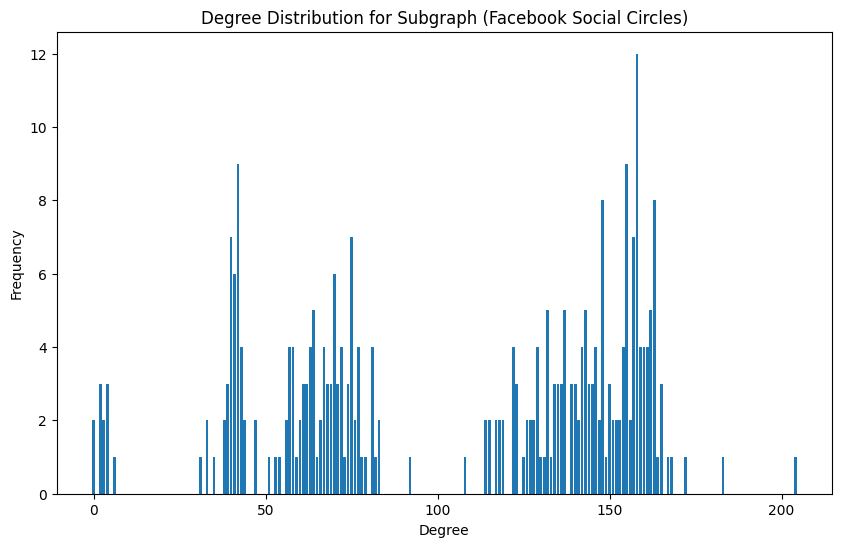

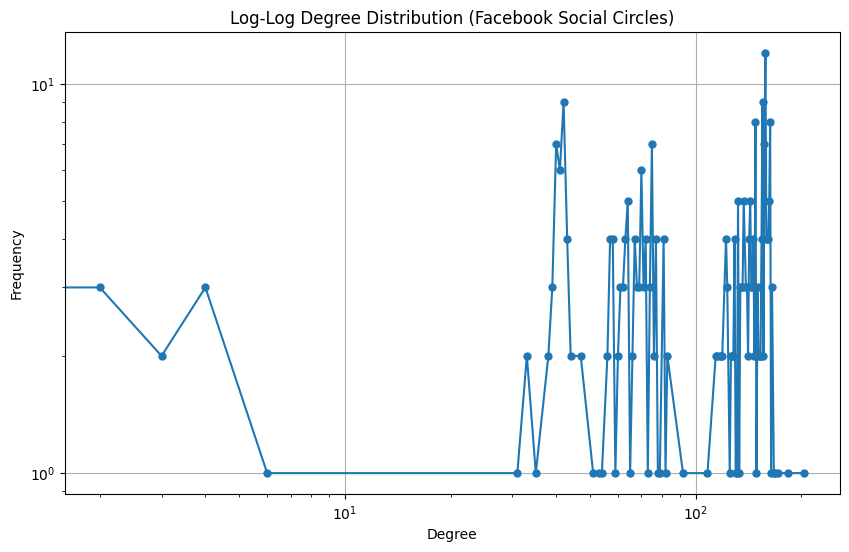

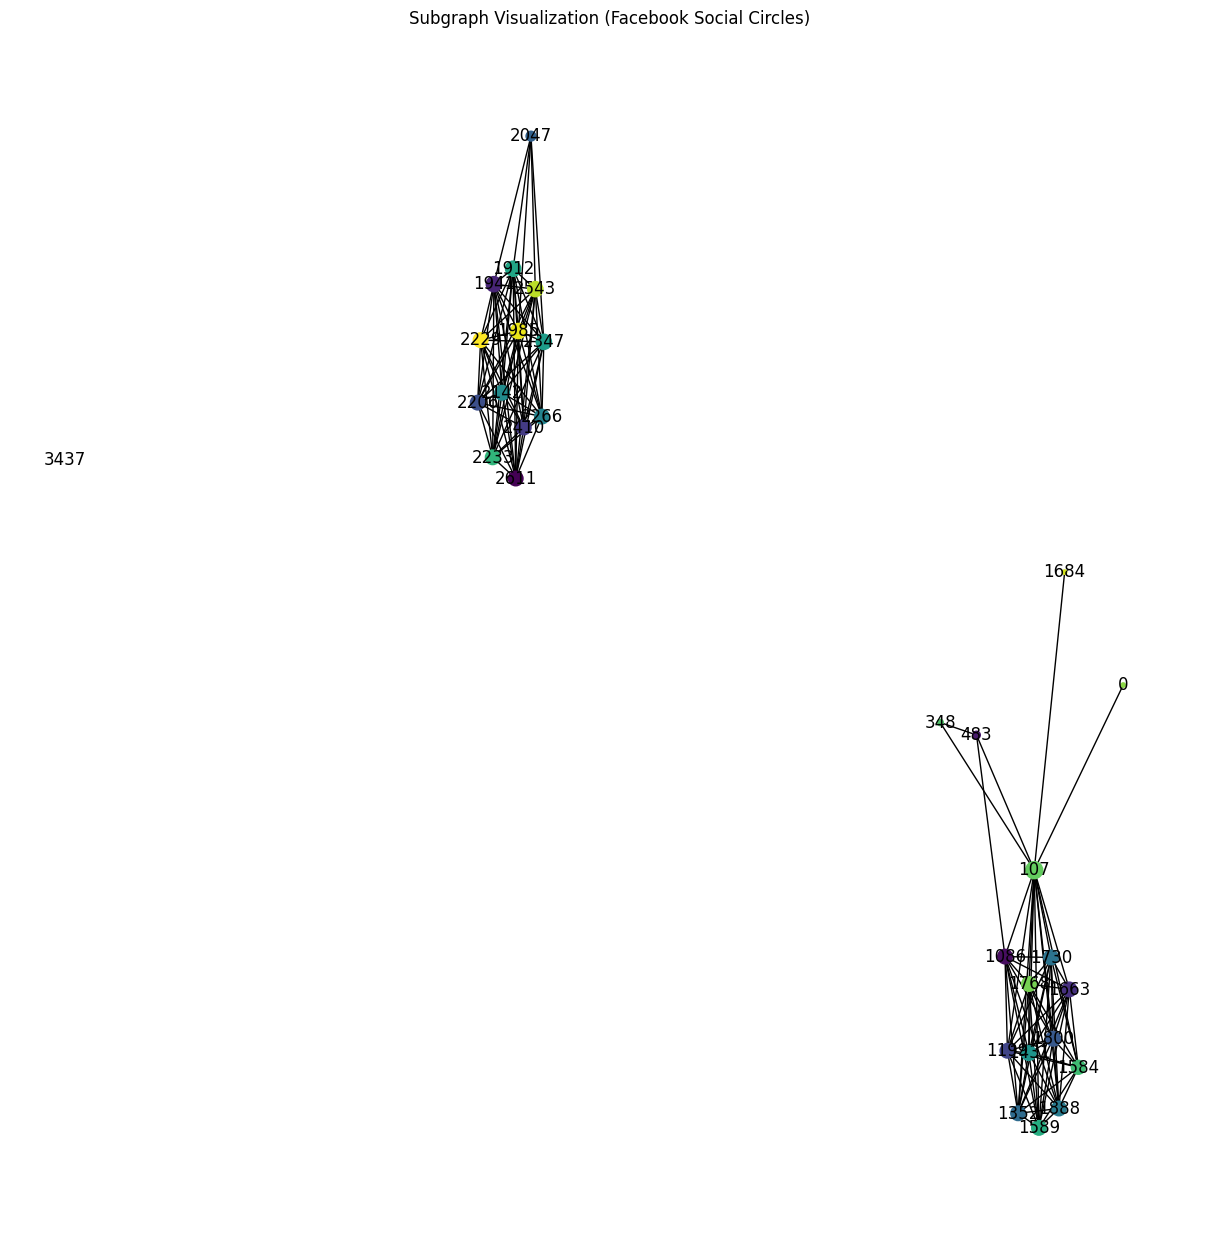

Hubs in the Facebook Social Circles network: [('107', 1045), ('1684', 792), ('1912', 755), ('3437', 547), ('0', 347)]



Performing power-law check...
Calculating best minimal value for power law fit
Power-law exponent (alpha): 2.510263154767209
Minimum value (xmin): 47.0
Comparison coefficient (R): -109.70270292690296
P-value: 1.0109665086696757e-08
The distribution does not follow a power-law.


In [3]:
facebook_circles = load_graph("facebook_combined.txt")

analyze_network(facebook_circles, "Facebook Social Circles")

G_circles = nx.read_edgelist('facebook_combined.txt', create_using=nx.Graph())
powerlaw_check(G_circles)